In [1]:
import numpy as np
import netCDF4 as nc

### **loading data**

In [2]:
def load_data(file_name, scenario): # scenario should be all lowercase, no spaces, and a string (i.e. 'ssp_119')
    ds = nc.Dataset(file_name)
    data = np.array(ds[f"data_{scenario}"]) # to pull data from specified scenario 
    ds.close()
    return data 

In [3]:
# cnrm
ssp119_cnrm = load_data('/Users/sophiekim/Desktop/msds/research/nc files/CNRM_ESM2-1_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp119')
ssp126_cnrm = load_data('/Users/sophiekim/Desktop/msds/research/nc files/CNRM_ESM2-1_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp126')

# miroc
ssp119_miroc = load_data('/Users/sophiekim/Desktop/msds/research/nc files/MIROC6_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp119')
ssp126_miroc = load_data('/Users/sophiekim/Desktop/msds/research/nc files/MIROC6_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp126')

# mpi 
ssp119_mpi = load_data('/Users/sophiekim/Desktop/msds/research/nc files/MPI-ESM1-2-LR_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp119')
ssp126_mpi = load_data('/Users/sophiekim/Desktop/msds/research/nc files/MPI-ESM1-2-LR_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp126')

# mri
ssp119_mri = load_data('/Users/sophiekim/Desktop/msds/research/nc files/MRI-ESM2-0_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc',  'ssp119')
ssp126_mri = load_data ('/Users/sophiekim/Desktop/msds/research/nc files/MRI-ESM2-0_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 'ssp126')

# ukesm 
ssp119_ukesm = load_data('/Users/sophiekim/Desktop/msds/research/nc files/UKESM1-0-LL_ssp119_ssp126_201501_210012_r1-5_2pt5degree (1).nc', 'ssp119')
ssp126_ukesm = load_data('/Users/sophiekim/Desktop/msds/research/nc files/UKESM1-0-LL_ssp119_ssp126_201501_210012_r1-5_2pt5degree (1).nc', 'ssp126')

In [4]:
# list for ssp119

model_119 = [ssp119_cnrm, ssp119_miroc, ssp119_mpi, ssp119_mri, ssp119_ukesm]

### **getting data ready**

In [5]:
def get_data_ready(model_list, st_early=2015, end_early=2025, st_late=2025, end_late=2035):

    # initialize empty arrays 
    x_data = np.zeros((500, 7, 144, 73))
    y_data = np.zeros((500, 1))

    # counter to index the y_data
    m = 0

    # looping through each year 
    for yr_idx in range(st_early, end_early):
        # going by month rather than yr values bc that's how it was set up
        month_start = (yr_idx - 2015) * 12 # multiplying by 12 for start of each yr 
        month_end = month_start + 12

    # going through each model in the compiled models
        for model_idx in range(len(model_list)):
            current_model = model_list[model_idx] 
        
        # going through each trajectory in the model 
            for ensemble_idx in range(5):
                # averaging values for annual to get rid of time dimension
                annual_mean = np.mean(current_model[ensemble_idx, :, month_start:month_end, :, :], axis=1)
                
                # adding annual value to x_data array & making y_data dimension to 0 bc early period
                x_data[m] = annual_mean
                y_data[m] = 0
                m += 1
                
    # same thing for late period 
    for yr_idx in range(st_late, end_late):
        month_start = (yr_idx - 2015) * 12
        month_end = month_start + 12
        
        for model_idx in range(len(model_list)):
            current_model = model_list[model_idx]
            
            for ens_idx in range(5):
                annual_mean = np.mean(current_model[ens_idx, :, month_start:month_end, :, :], axis=1)
                
                x_data[m] = annual_mean
                y_data[m] = 1
                m += 1
                
    return x_data, y_data

In [6]:
x_data, y_data = get_data_ready(model_119) 

In [7]:
x_data.shape

(500, 7, 144, 73)

In [8]:
y_data.shape

(500, 1)

### **improved script**

In [10]:
def get_data_ready(model_list, scenario, st_early=2015, end_early=2024, st_late=2050, end_late=2059): # can change the yrs in the function call too (values are default)
    
    loaded_data = [] # initialize empty list for data loading
    for i in model_list: # going through model list
        ds = nc.Dataset(i)
        data = np.array(ds[f"data_{scenario}"]) # to pull data from specified scenario 
        loaded_data.append(data) # adding array to lst
        ds.close()
    # initialize empty arrays 
    x_data = np.zeros((500, 7, 144, 73))
    y_data = np.zeros((500, 1))

    # counter to index the y_data
    m = 0

    # looping through each year 
    for yr_idx in range(st_early, end_early+1):
        # going by month rather than yr values bc that's how it was set up
        month_start = (yr_idx - 2015) * 12 # multiplying by 12 for start of each yr 
        month_end = month_start + 12

    # going through each model in the compiled models
        for model_idx in range(len(loaded_data)):
            current_model = loaded_data[model_idx] 
        
        # going through each trajectory in the model 
            for ensemble_idx in range(5):
                # averaging values for annual to get rid of time dimension
                annual_mean = np.mean(current_model[ensemble_idx, :, month_start:month_end, :, :], axis=1)
                # adding annual value to x_data array & making y_data dimension to 0 bc early period
                x_data[m] = annual_mean
                y_data[m] = 0
                m += 1
                
    # same thing for late period 
    for yr_idx in range(st_late, end_late+1):
        month_start = (yr_idx - 2015) * 12
        month_end = month_start + 12
        
        for model_idx in range(len(loaded_data)):
            current_model = loaded_data[model_idx]
            
            for ens_idx in range(5):
                annual_mean = np.mean(current_model[ens_idx, :, month_start:month_end, :, :], axis=1)
                
                x_data[m] = annual_mean
                y_data[m] = 1
                m += 1
                
    return x_data, y_data

In [3]:
model_list = ['/Users/sophiekim/Desktop/research/MamalakisResearch/data/CNRM_ESM2-1_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc',
              '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MIROC6_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 
              '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MPI-ESM1-2-LR_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 
              '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MRI-ESM2-0_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', 
              '/Users/sophiekim/Desktop/research/MamalakisResearch/data/UKESM1-0-LL_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc']

In [8]:
get_data_ready(model_list, 'ssp119')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
x_data, y_data = get_data_ready(model_list, 'ssp119')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(y_data)

In [ ]:
x_data2, y_data2 = get_data_ready(model_list, 'ssp126')

In [ ]:
plt.plot(y_data2)

### **trying to standardize file loading**

In [ ]:
import os

# change to specific directory for user running code 
os.chdir("/Users/sophiekim/Desktop/research/MamalakisResearch") 
base_path = os.getcwd()

# everyone should have locally loaded 'data' folder
data_path = base_path + '/data/'

In [ ]:
# initializing model list variable to call in function
model_list = [
    "CNRM_ESM2-1_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc",
    "MIROC6_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc",
    "MPI-ESM1-2-LR_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc",
    "MRI-ESM2-0_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc",
    "UKESM1-0-LL_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc",
]

['/Users/sophiekim/Desktop/research/MamalakisResearch/data/CNRM_ESM2-1_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MIROC6_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MPI-ESM1-2-LR_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', '/Users/sophiekim/Desktop/research/MamalakisResearch/data/MRI-ESM2-0_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc', '/Users/sophiekim/Desktop/research/MamalakisResearch/data/UKESM1-0-LL_ssp119_ssp126_201501_210012_r1-5_2pt5degree.nc']
['lat', 'lon', 'time', 'data_ssp119', 'data_ssp126']


In [ ]:
def get_data_ready(model_list, scenario, st_early=2015, end_early=2024, st_late=2050, end_late=2059): # can change the yrs in the function call too (values are default)
    
    loaded_data = []
    
    for filename in model_list:
        # getting file path
        full_path = os.path.join(data_path, filename)
        
        # loading nc files in with specific ssp scenario
        with nc.Dataset(full_path) as ds:
            data = np.array(ds[f"data_{scenario}"])
            loaded_data.append(data)
            
    # initialize empty arrays 
    x_data = np.zeros((500, 7, 144, 73))
    y_data = np.zeros((500, 1))

    # counter to index the y_data
    m = 0

    # looping through each year 
    for yr_idx in range(st_early, end_early+1):
        # going by month rather than yr values bc that's how it was set up
        month_start = (yr_idx - 2015) * 12 # multiplying by 12 for start of each yr 
        month_end = month_start + 12

    # going through each model in the compiled models
        for model_idx in range(len(loaded_data)):
            current_model = loaded_data[model_idx] 
        
        # going through each trajectory in the model 
            for ensemble_idx in range(5):
                # averaging values for annual to get rid of time dimension
                annual_mean = np.mean(current_model[ensemble_idx, :, month_start:month_end, :, :], axis=1)
                # adding annual value to x_data array & making y_data dimension to 0 bc early period
                x_data[m] = annual_mean
                y_data[m] = 0
                m += 1
                
    # same thing for late period 
    for yr_idx in range(st_late, end_late+1):
        month_start = (yr_idx - 2015) * 12
        month_end = month_start + 12
        
        for model_idx in range(len(loaded_data)):
            current_model = loaded_data[model_idx]
            
            for ens_idx in range(5):
                annual_mean = np.mean(current_model[ens_idx, :, month_start:month_end, :, :], axis=1)
                
                x_data[m] = annual_mean
                y_data[m] = 1
                m += 1
                
    return x_data, y_data

In [27]:
x_data, y_data = get_data_ready(model_list, 'ssp119')

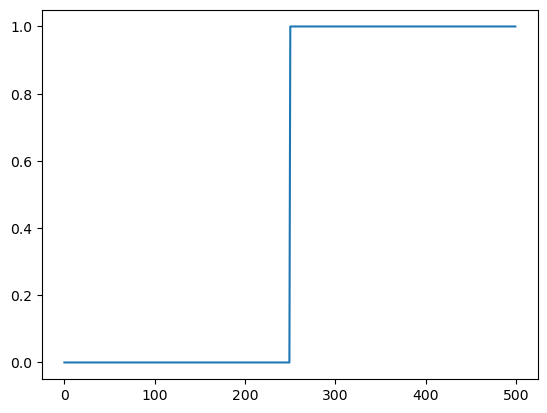

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_data)

In [30]:
x_data, y_data = get_data_ready(model_list, 'ssp126')

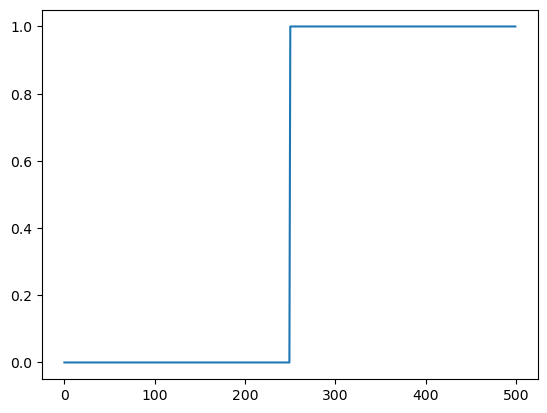

In [31]:
plt.plot(y_data)